In [173]:
import numpy as mp
import pandas as pd
import pyomo.environ as pyo
import matplotlib.pyplot as plt

In [174]:
min_15 = True

if min_15:
    csv_path = 'data/dispatch_results_15.csv'
else:
    csv_path = 'data/dispatch_results.csv'

# csv_path = 'data/clean_spot_price_01:11:2025.csv'

df = pd.read_csv(csv_path)

df['cumulative profit'] = df['profit_EUR'].cumsum()
x = df['t']
y1 = df['price']
y2 = df['soc_percent']
y3 = df['cumulative profit']

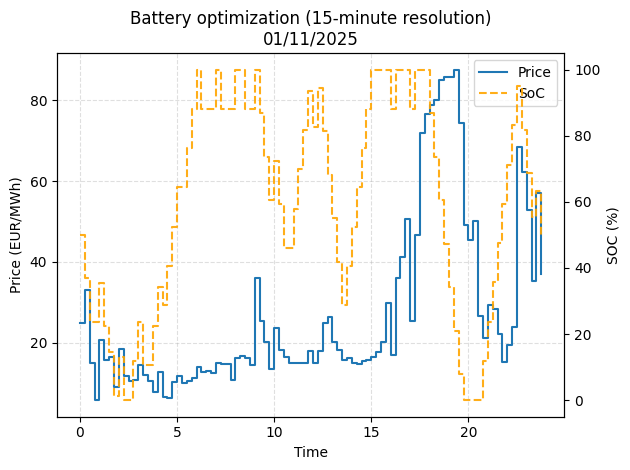

In [175]:
fig, ax1 = plt.subplots()

# Left axis: Price
l1, = ax1.step(
    x,
    y1,
    where="post",
    label="Price",
)
ax1.set_ylabel("Price (EUR/MWh)")
ax1.grid(True, linestyle="--", alpha=0.4)

# Right axis: SOC
ax2 = ax1.twinx()
l2, = ax2.step(
    x,
    y2,
    where="post",
    label="SoC",
    linestyle="--",
    color="orange",
    alpha=0.9
)
ax2.set_ylabel("SOC (%)")

# Shared elements
ax1.set_xlabel("Time")
ax1.set_title("Battery optimization (15-minute resolution)\n01/11/2025" if min_15 else "Battery optimization (1-hour resolution)\n01/11/2025")

# Single legend for both axes
ax1.legend(handles=[l1, l2], loc="best")

fig.tight_layout()
if min_15:
    fig.savefig('figures/battery_optimization_plot_15.png', dpi=300)
else:
    fig.savefig('figures/battery_optimization_plot.png', dpi=300)
plt.show()


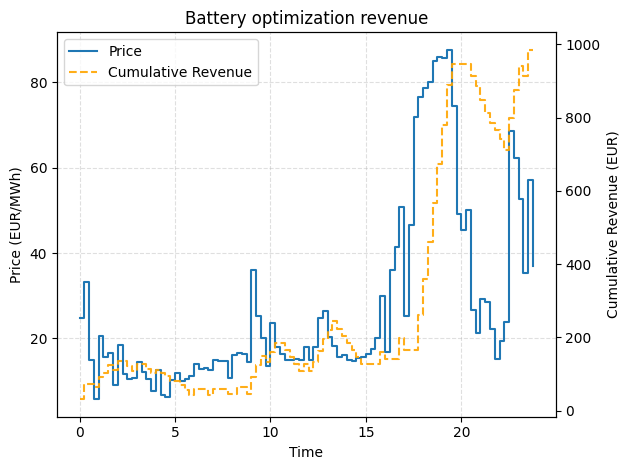

In [176]:
fig, ax1 = plt.subplots()

# Left axis: Price
l1, = ax1.step(
    x,
    y1,
    where="post",
    label="Price",
)
ax1.set_ylabel("Price (EUR/MWh)")
ax1.grid(True, linestyle="--", alpha=0.4)

# Right axis: SOC
ax2 = ax1.twinx()
l2, = ax2.step(
    x,
    y3,
    where="post",
    label="Cumulative Revenue",
    linestyle="--",
    color="orange",
    alpha=0.9
)
ax2.set_ylabel("Cumulative Revenue (EUR)")

# Shared elements
ax1.set_xlabel("Time")
ax1.set_title("Battery optimization revenue")

# Single legend for both axes
ax1.legend(handles=[l1, l2], loc="best")

fig.tight_layout()
fig.savefig('figures/battery_optimization_revenue_plot.png', dpi=300)
plt.show()


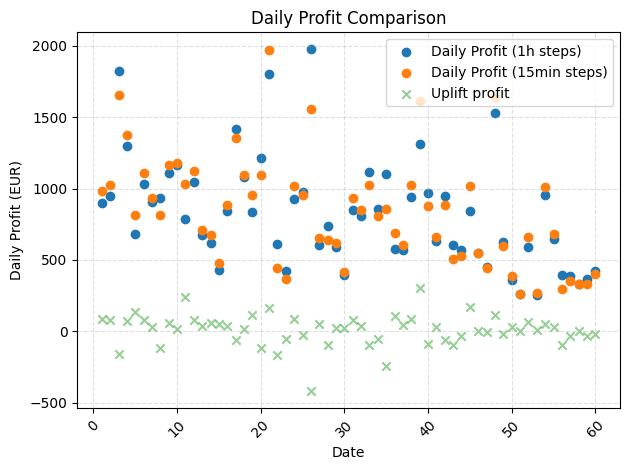

2.722415137349954 3.3975896381578954
24.800571064454484


In [177]:
csv_path='data/daily_summary.csv'
csv_path_15='data/daily_summary_15.csv'

df = pd.read_csv(csv_path)
df_15 = pd.read_csv(csv_path_15)

df['cumulative_profit'] = df['profit_EUR'].cumsum()
df_15['cumulative_profit'] = df_15['profit_EUR'].cumsum()

nb_days = len(df)

plt.scatter(range(1,nb_days+1), df['profit_EUR'], label='Daily Profit (1h steps)')
plt.scatter(range(1,nb_days+1), df_15['profit_EUR'], label='Daily Profit (15min steps)')
plt.scatter(range(1,nb_days+1), df_15['profit_EUR'] - df['profit_EUR'], label='Uplift profit', marker='x', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Daily Profit (EUR)')
plt.title('Daily Profit Comparison')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/daily_profit_comparison.png', dpi=300)
plt.show()

print(df['full_cycles'].mean(), df_15['full_cycles'].mean())
print((df_15['full_cycles'].mean() - df['full_cycles'].mean())/df['full_cycles'].mean() * 100)

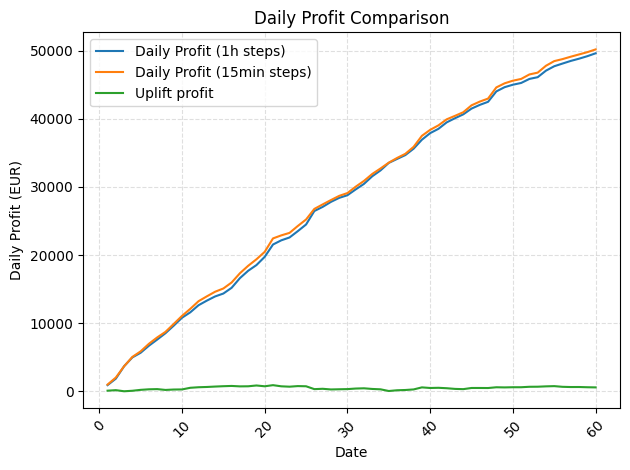

In [178]:
plt.plot(range(1,nb_days+1), df['cumulative_profit'], label='Daily Profit (1h steps)')
plt.plot(range(1,nb_days+1), df_15['cumulative_profit'], label='Daily Profit (15min steps)')
plt.plot(range(1,nb_days+1), df_15['cumulative_profit'] - df['cumulative_profit'], label='Uplift profit')
plt.xlabel('Date')
plt.ylabel('Daily Profit (EUR)')
plt.title('Daily Profit Comparison')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/daily_profit_comparison.png', dpi=300)
plt.show()

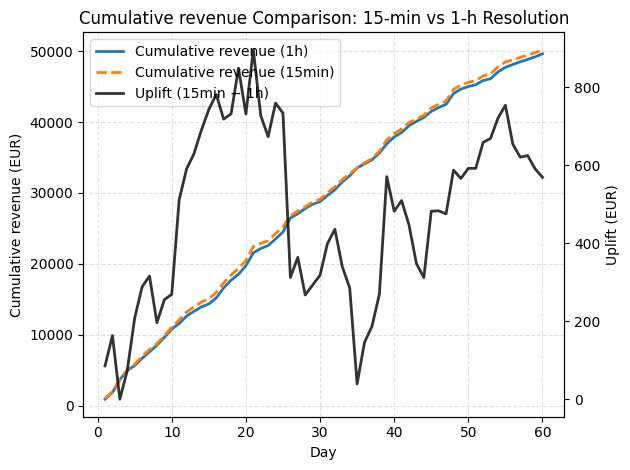

In [182]:
fig, ax1 = plt.subplots()

x = range(1, nb_days + 1)

# Left axis: cumulative profits
l1, = ax1.plot(
    x,
    df["cumulative_profit"],
    label="Cumulative revenue (1h)",
    linewidth=2
)

l2, = ax1.plot(
    x,
    df_15["cumulative_profit"],
    label="Cumulative revenue (15min)",
    linewidth=2,
    linestyle="--"
)

ax1.set_xlabel("Day")
ax1.set_ylabel("Cumulative revenue (EUR)")
ax1.grid(True, linestyle="--", alpha=0.4)

# Right axis: uplift
ax2 = ax1.twinx()
uplift = df_15["cumulative_profit"] - df["cumulative_profit"]

l3, = ax2.plot(
    x,
    uplift,
    label="Uplift (15min − 1h)",
    linewidth=2,
    color="black",
    alpha=0.8
)

ax2.set_ylabel("Uplift (EUR)")

# Title
ax1.set_title("Cumulative revenue Comparison: 15-min vs 1-h Resolution")

# Single merged legend
ax1.legend(handles=[l1, l2, l3], loc="best")

fig.tight_layout()
plt.savefig("figures/daily_profit_comparison.png", dpi=300)
plt.show()


5.171220732285384
1.1229208858409852
2025-11-21      0.175600
2025-11-22      0.102865
2025-11-23      0.072451
2025-11-24      0.143265
2025-11-25      0.157850
2025-11-26      0.250813
2025-11-27      0.122869
2025-11-28      0.102938
2025-11-29      0.104348
2025-11-30      0.080213
2025-12-01      0.175037
2025-12-02      0.163208
2025-12-03      0.170665
2025-12-04      0.147022
2025-12-05      0.178764
2025-12-06      0.355244
2025-12-07      0.626738
2025-12-08      0.354520
2025-12-09           NaN
2025-12-10    244.339487
2025-12-11      0.130961
2025-12-12      0.130593
2025-12-13      0.085961
2025-12-14      0.126331
2025-12-15      1.055306
2025-12-16      0.068950
2025-12-17      0.085423
2025-12-18           NaN
2025-12-19      0.153673
2025-12-20      0.068158
2025-12-21      0.054533
2025-12-22     10.079106
2025-12-23      0.058597
2025-12-24      0.351086
2025-12-25      0.173823
2025-12-26      0.057034
2025-12-27      0.055327
2025-12-28      0.078738
2025-12-29   

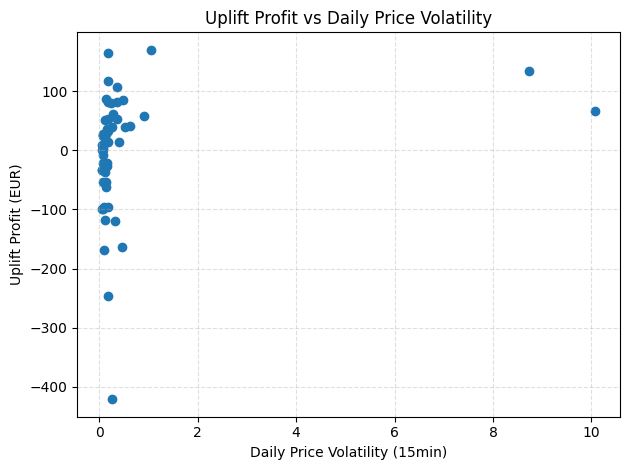

In [180]:
df_spot = pd.read_csv('data/clean_hourly_spot_price_2025.csv', index_col='time', parse_dates=True)
df_spot_15 = pd.read_csv('data/clean_spot_price_2025.csv', index_col='time', parse_dates=True)

df_spot["return"] = df_spot["price"].pct_change()
daily_volatility = (
    df_spot["return"]
    .groupby(df_spot.index.date)
    .std()
)

df_spot_15["return"] = df_spot_15["price"].pct_change()
daily_volatility_15 = (
    df_spot_15["return"]
    .groupby(df_spot_15.index.date)
    .std()
)

print(daily_volatility_15.mean())
print(daily_volatility.mean())
print(daily_volatility_15[20:])

daily_uplift = (
    df_15["profit_EUR"] - df["profit_EUR"]
)
daily_uplift.index = daily_volatility_15.index

bad_day = pd.Timestamp('2025-12-10').normalize()
daily_volatility_15 = daily_volatility_15.drop(bad_day)
daily_uplift = daily_uplift.drop(bad_day)


plt.scatter(daily_volatility_15, daily_uplift)
plt.xlabel("Daily Price Volatility (15min)")
plt.ylabel("Uplift Profit (EUR)")
plt.title("Uplift Profit vs Daily Price Volatility")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig('figures/uplift_profit_vs_volatility.png', dpi=300)
plt.show()